In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 32})
sns.set_context("poster", rc={"font.size":34,"axes.titlesize":34,"axes.labelsize":34, "lines.linewidth": 2})  
plt.rcParams['figure.figsize'] = 18, 12

pd.options.display.max_columns = 999
pd.options.display.max_rows = 100


from datetime import datetime
str(datetime.now())



'2017-08-10 13:27:03.404640'

In [11]:
df = pd.read_excel('../../measurements/ECCC/LakeErie_Markelov_Dove26May2017.xlsx', sheetname='Data')

In [10]:
df.columns

Index(['CRUISE_PLAN', 'CRUISE_START_DATE', 'CRUISE_STOP_DATE',
       'LAST_DATE_UPDATED', 'WATER_BODY', 'CSN', 'LATITUDE_DD', 'LONGITUDE_DD',
       'PSN', 'SOUNDING', 'STN_DATE', 'CODE', 'DEPTH_FROM', 'DEPTH_TO',
       'DETECTION', 'FLAG', 'SEQ_NO', 'VALUE', 'ABBREV', 'FULL_NAME', 'UNITS'],
      dtype='object')

In [25]:
data = df[(df.PSN==970) & (df.CODE==245)]

/Users/MarkelovIgor/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
/Users/MarkelovIgor/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:3225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  na_position=na_position)


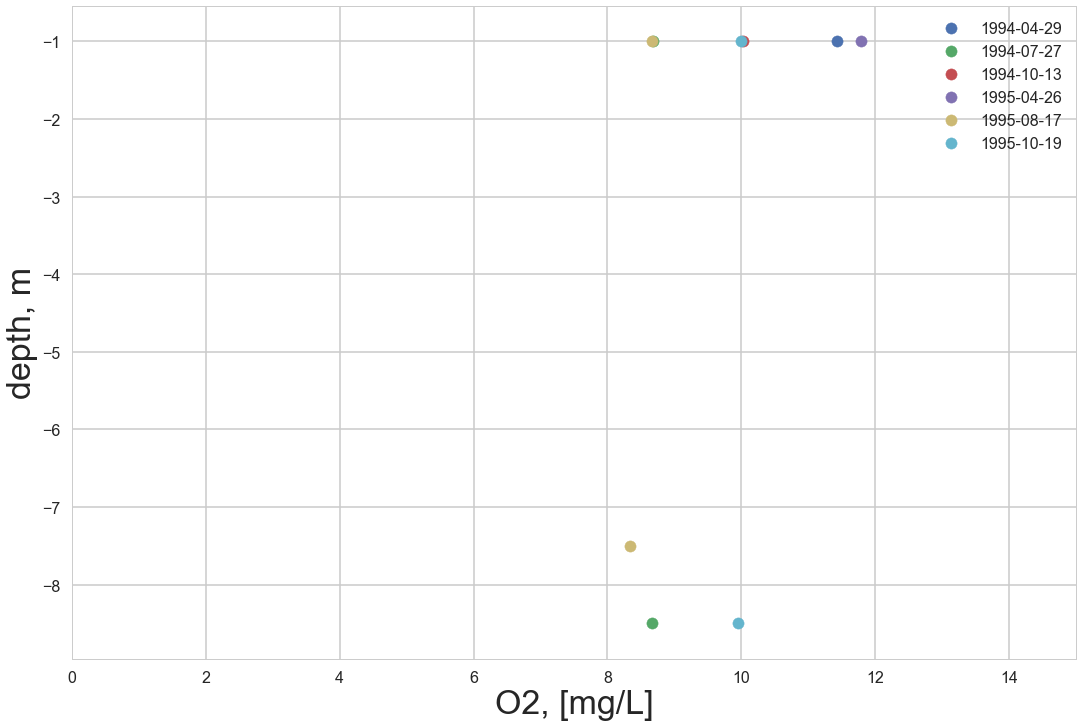

In [49]:
for d in data.STN_DATE.unique()[:6]:
    one_date = data[data.STN_DATE ==d]
    one_date.sort(columns='STN_DATE', inplace=True)
    plt.scatter(one_date['VALUE'], -one_date['DEPTH_FROM'], label=str(d)[:10])
    plt.xlabel('O2, [mg/L]')
    plt.ylabel('depth, m')
    plt.xlim(0,15)
plt.legend()

/Users/MarkelovIgor/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
/Users/MarkelovIgor/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:3225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  na_position=na_position)


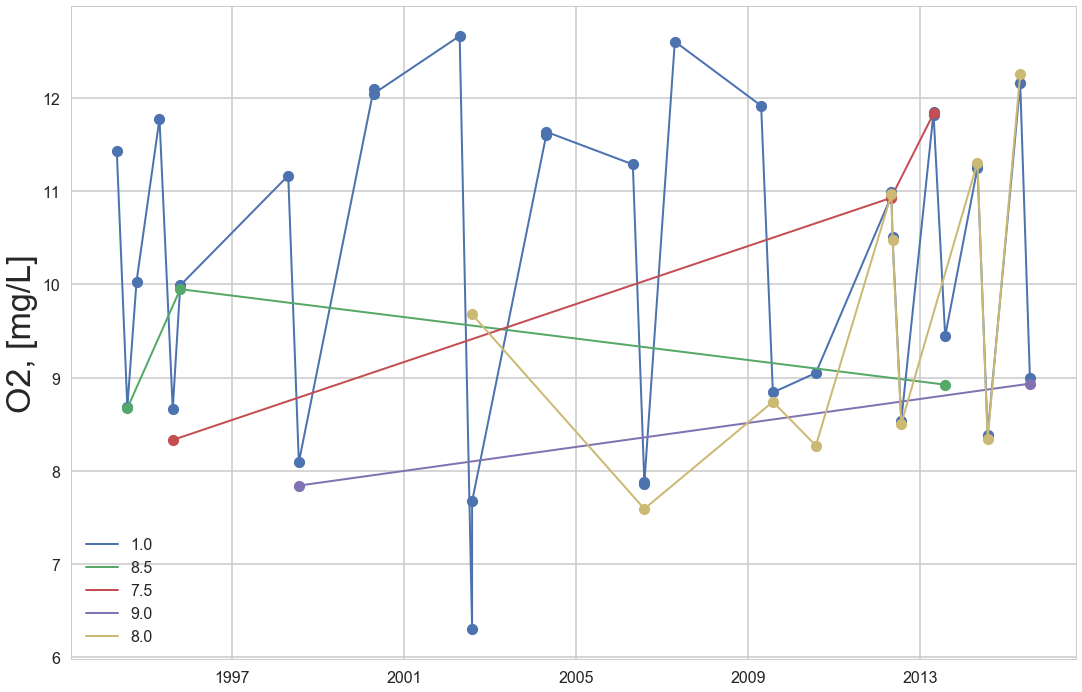

In [80]:
for c,d in zip( sns.color_palette(), data.DEPTH_FROM.unique()):
    one_date = data[data.DEPTH_FROM ==d]
    one_date.sort(columns='STN_DATE', inplace=True)
#     try:
    plt.plot_date(one_date['STN_DATE'], one_date['VALUE'], color=c, label='_nolegend_')
    plt.plot(one_date['STN_DATE'], one_date['VALUE'], color=c, label=str(d))
#     except:
#         pass
    plt.ylabel('O2, [mg/L]')
#     plt.ylabel('depth, m')
#     plt.xlim(0,15)
plt.legend()

In [81]:
data_tp = df[(df.PSN==970) & (df.CODE==260)]

/Users/MarkelovIgor/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
/Users/MarkelovIgor/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:3225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  na_position=na_position)


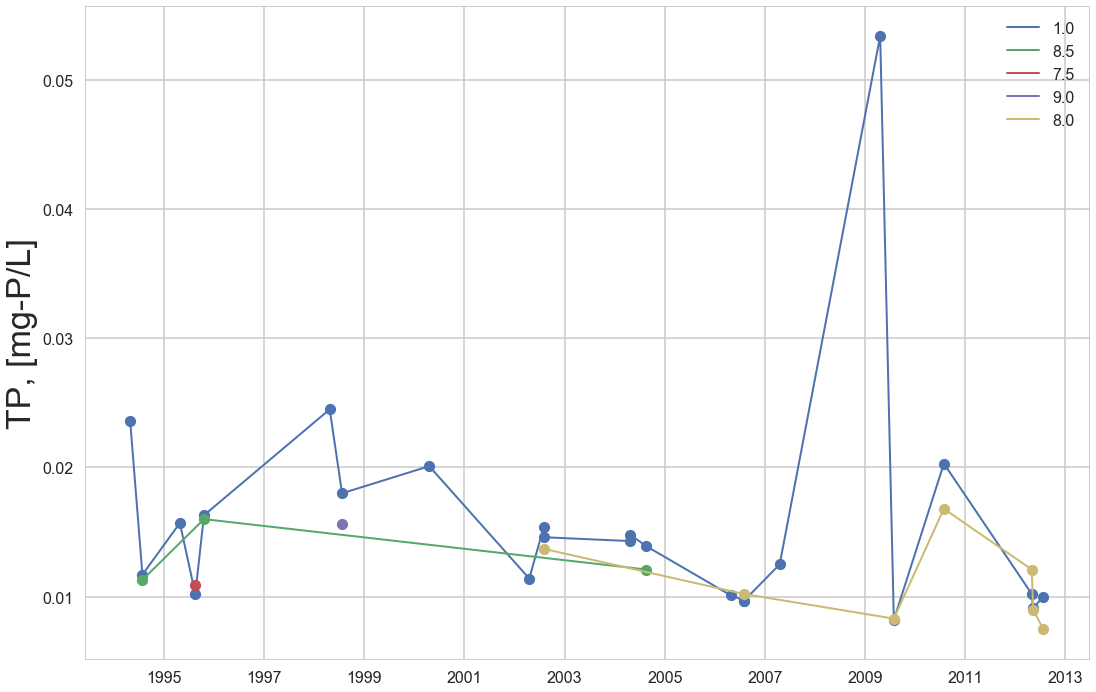

In [83]:
for c,d in zip( sns.color_palette(), data.DEPTH_FROM.unique()):
    one_date = data_tp[data_tp.DEPTH_FROM ==d]
    one_date.sort(columns='STN_DATE', inplace=True)
#     try:
    plt.plot_date(one_date['STN_DATE'], one_date['VALUE'], color=c, label='_nolegend_')
    plt.plot(one_date['STN_DATE'], one_date['VALUE'], color=c, label=str(d))
#     except:
#         pass
    plt.ylabel('TP, [mg-P/L]')
#     plt.ylabel('depth, m')
#     plt.xlim(0,15)
plt.legend()